In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import numpy 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
import os 

os.chdir("..")
os.getcwd()

'd:\\VS_code\\MLops\\11_End-to-End_Projects\\ML_project'

In [4]:
# Importing the dataset 

df = pd.read_csv("data\stud.csv")
df.shape

(1000, 8)

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# Checking missing values 

df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
# Checking for duplicates 
df.duplicated().sum()

np.int64(0)

In [8]:
# Dtypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# No of unique values present 
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
# Statistical report 

df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
# Adding total score and average score feature 

df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average_score"] = df["total_score"]/3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
no_of_cent_math = df[df["math_score"]==100]["total_score"].count()
no_of_cent_reading = df[df["reading_score"]==100]["total_score"].count()
no_of_cent_writing = df[df["writing_score"]==100]["total_score"].count()

print(f"Number of students centum in maths : {no_of_cent_math}")
print(f"Number of students centum in reading : {no_of_cent_reading}")
print(f"Number of students centum in writing : {no_of_cent_writing}")

Number of students centum in maths : 7
Number of students centum in reading : 17
Number of students centum in writing : 14


In [13]:
no_of_below20_math = df[df["math_score"]<=20]["total_score"].count()
no_of_below20_reading = df[df["reading_score"]<=20]["total_score"].count()
no_of_below20_writing = df[df["writing_score"]<=20]["total_score"].count()

print(f"Number of students got bellow 20 in maths : {no_of_below20_math}")
print(f"Number of students got bellow 20 in reading : {no_of_below20_reading}")
print(f"Number of students got bellow 20 in writing : {no_of_below20_writing}")

Number of students got bellow 20 in maths : 4
Number of students got bellow 20 in reading : 1
Number of students got bellow 20 in writing : 3


In [14]:
# Numerical and categorical features 

categorical_features = (df.select_dtypes("O").columns).to_list()
numerical_features = (df.select_dtypes(exclude="O").columns).to_list()

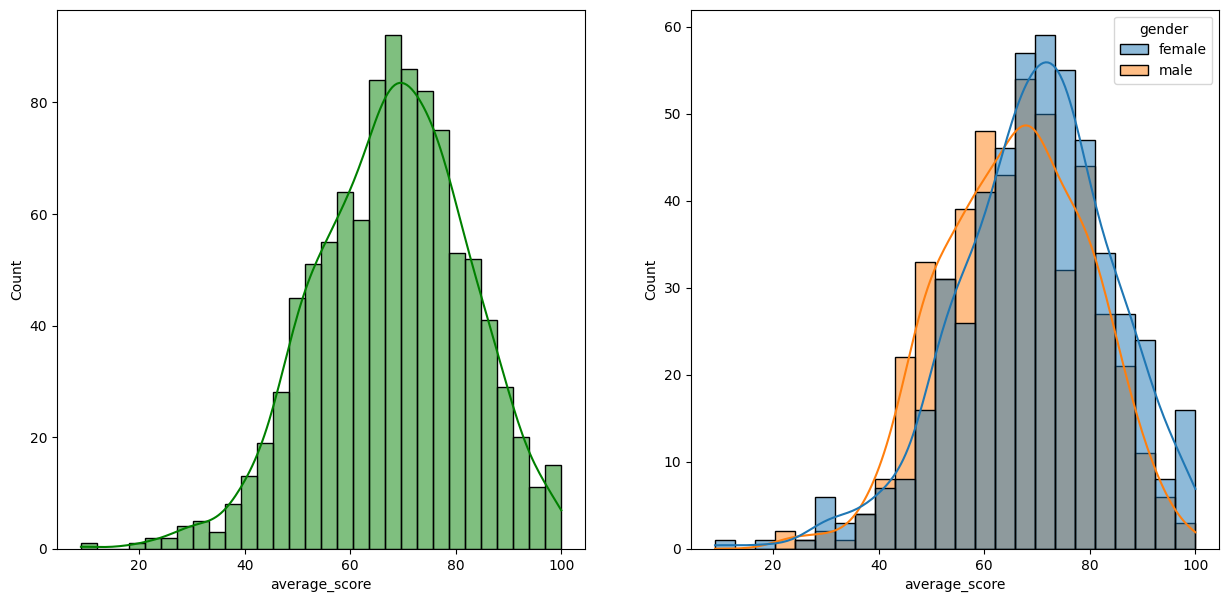

In [15]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x="average_score", bins=30, kde=True, color="g")
plt.subplot(122)
sns.histplot(data=df, x="average_score", kde=True, hue="gender")
plt.show()

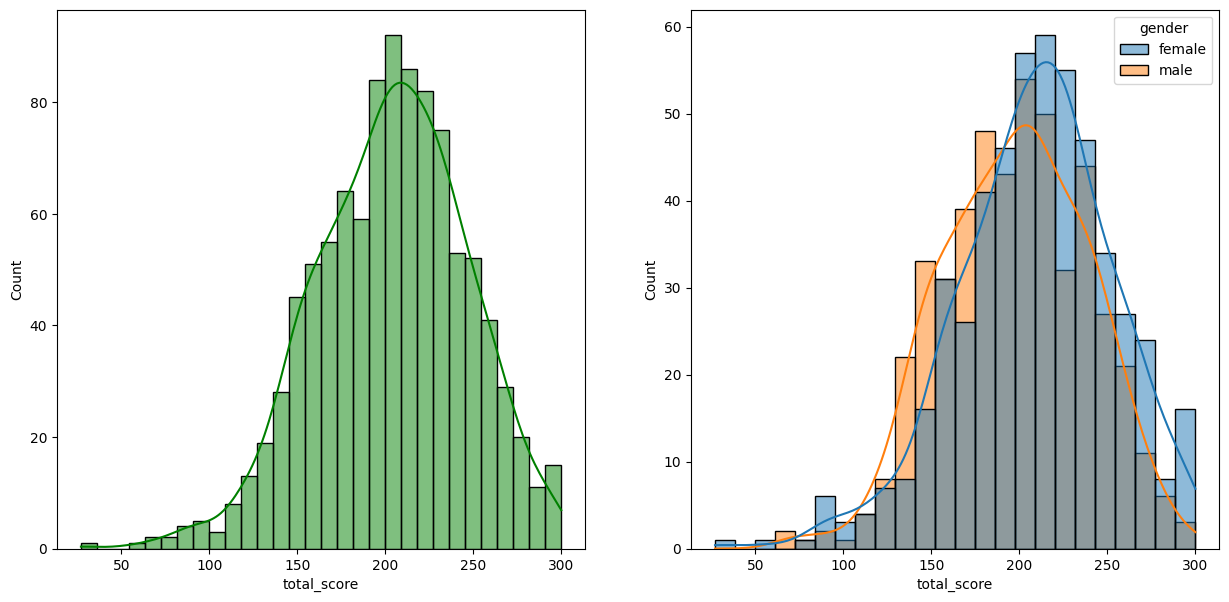

In [16]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x="total_score", bins=30, kde=True, color="g")
plt.subplot(122)
sns.histplot(data=df, x="total_score", kde=True, hue="gender")
plt.show()

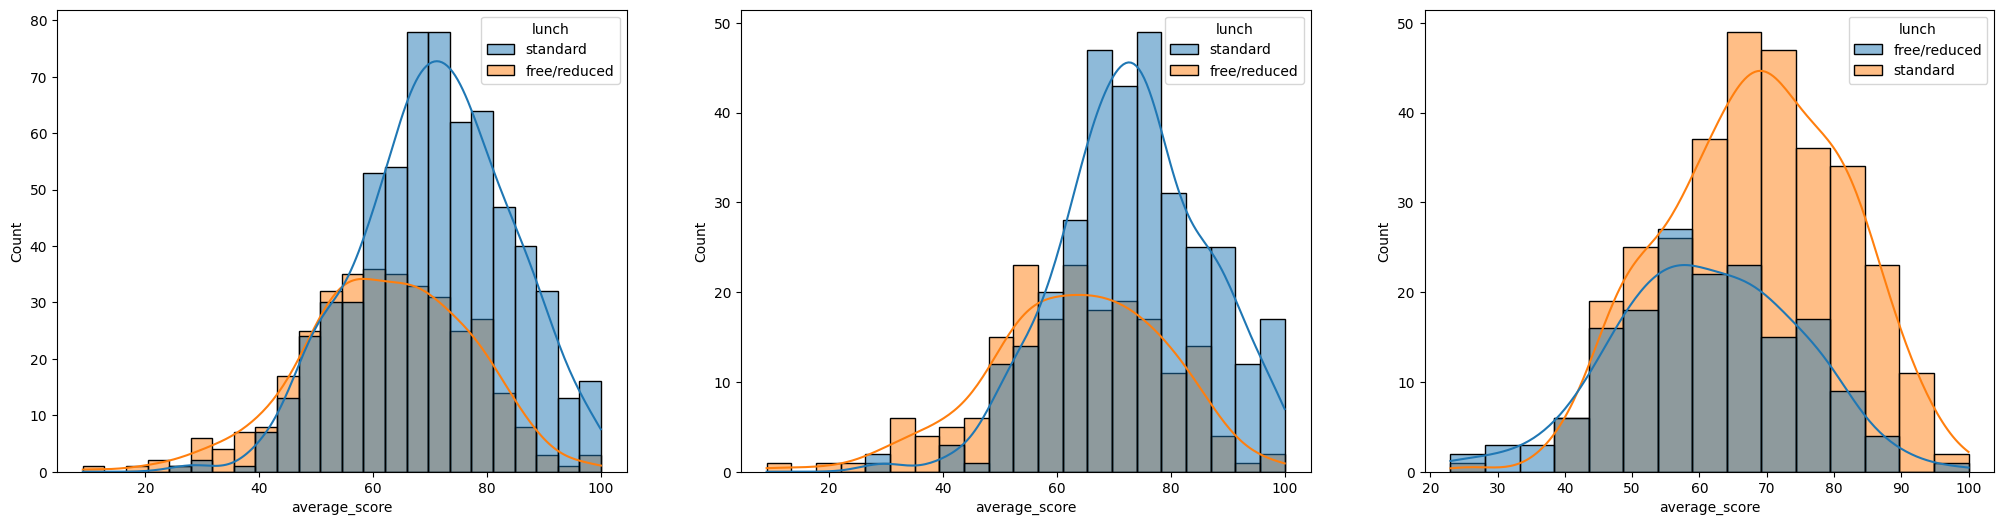

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x="average_score", kde=True, hue="lunch")
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"], x="average_score", kde=True, hue="lunch")
plt.subplot(133)
sns.histplot(data=df[df.gender=="male"], x="average_score", kde=True, hue="lunch")
plt.show()
